# Занятие 2. Спектры импульсных и периодических сигналов.

In [2]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
import scipy.integrate as integrate # импорт модуля численного интегрирования
from my_lib import *

## Задача 2.1. Спектры симметричных оконных функций

|  Варианты:  |  1  |  2  |   3  |   4  |  5  |   6  |  7  |   8  |   9  |  10 |  11  |  12  |
|:-----------:|:---:|:---:|:----:|:----:|:---:|:----:|:---:|:----:|:----:|:---:|:----:|:----:|
| $\tau$**, мкс** | 100 | 500 | 1000 | 5000 | 400 | 2000 | 300 | 1500 | 3000 | 800 | 3500 | 4000 |


Ниже приведен пример вычисления модуля спектральной плотности $|X(f)|$ для прямоугольного окна длительностью $\tau=150$ мкс. 

Для заданного параметра $\tau$ из таблицы, построить графики модуля спектральной плотности $|X(f)|$ для прямоугольного окна, 
$$w_b(t)=\left\{ \begin{matrix}
   1, & \text{ }\text{если }|t|\le \tau /2,  \\
   0, & \text{ }\text{если }|t|>\tau /2; \\
\end{matrix} \right.$$
треугольного окна
$$w_t(t)=\left\{ \begin{matrix}
   1-\dfrac{|t|}{\tau /2}, & \text{ }\text{если }|t|\le \tau /2,  \\
   0, & \text{ }\text{если }|t|>\tau /2.  \\
\end{matrix} \right.$$
 и окна Ханна
$$w_H(t)=\left\{ \begin{matrix}
   \dfrac{1}{2}\left( 1+\cos \left( 2\pi \dfrac{t}{\tau } \right) \right), & \text{ }\text{если }|t|\le \tau /2,  \\
   0, & \text{ }\text{если }|t|>\tau /2.  \\
\end{matrix} \right.$$



Привести аналитические формулы спектральной плотности для этих импульсов. 
Определить 
* а) уровни первого бокового лепестка относительно главного в $|X(f)|$ (практич.) в дБ ($20\lg  \left|\dfrac{X(f)}{X(0)}\right| $ ),
* б) расположение нулей $|X(f)|$ (практич. и теоретическое).

Заполнить таблицу для трех окон.

| Окна  |   Уровень первого бокового лепестка относительно главного, дБ  |  Ширина главного лепестка, Гц  |
|:-----------:|:---:|:---:|
| прямоугольное | -30.5| 1240  |
| треугольное | -61.07 |  2480 |
| Ханна |-72.45  |   2480 |


250
281
-30.528352806111826


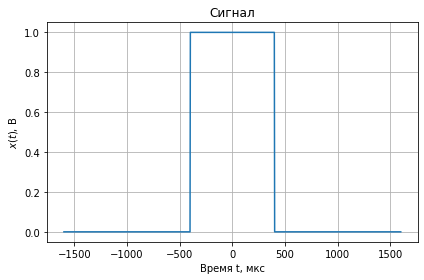

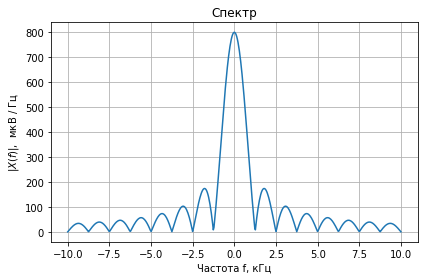

In [3]:
from cmath import nan
from math import cos, pi, log

tau=800e-6 #800 мкс

f_band=np.linspace(-8/tau, 8/tau, 500) # 500 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if abs(t)<tau/2:
        return 1.0                 
    else:
        return 0.0  

# добавим функции треугольного окна и окна Ханна
def triangle(t, tau):
    if abs(t)<tau/2:
        return 1.0 - abs(t)*2 / tau               
    else:
        return 0.0  

def Han(t, tau):
    if abs(t)<tau/2:
        return 0.5 * (1 + cos(2*pi * t/tau))             
    else:
        return 0.0             

# добавим переменную текущей функции (чтобы менять ее только в одном месте)
cur_function = boxcar

t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[6, 4])
plt.plot(t_band*1e6, [cur_function(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[6, 4])
plt.plot(f_band/1e3, fourier_transform(signal=cur_function, f_band=f_band, tau=tau, t1=-tau/2, t2=tau/2, res_type="abs")*1e6)
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр")
plt.tight_layout() 
plt.grid()

spectr = fourier_transform(signal=cur_function, f_band=f_band, tau=tau, t1=-tau/2, t2=tau/2, res_type="abs")*1e6

# индекс максимальных элементов
max_idx = np.where(spectr == max(spectr)) # на самом деле это tuple)))


first_min_idx = 0
# от максимального элемента начинаем искать справа первый перегиб
for i in range(max_idx[0][-1], 500):
    if spectr[i+1] > spectr[i]:
        first_min_idx = i
        break

print(max_idx[0][-1])
print(first_min_idx)

'''
Мы посчитали, что между 2мя соседними индексами при данном tau помещается 40 Гц
Так что дальше нужно только умножить разницу между двумя найденными индексами на 40 Гц
'''

'''
Аналогично получим первый пик справа
'''
right_max_idx = 0
for i in range(first_min_idx, 500):
    if spectr[i+1] < spectr[i]:
        right_max_idx = i
        break

print(20 * log(abs(spectr[right_max_idx] / spectr[max_idx[0][-1]])))

### Аналитические формулы спектральной плотности данных сигналов

Прямоугольное окно
$$X(f) = \tau \frac{\sin(\pi f \tau)}{\pi f \tau}$$

Треугольное окно
$$X(f) = \frac{\tau}{2} \frac{\sin^2(\pi f \tau / 2)}{(\pi f \tau / 2)^2}$$